In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import *
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\ppawa\Pranav\Study\Engineering\SEM 5\ML\Lab\ML-Labs\BreastCancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


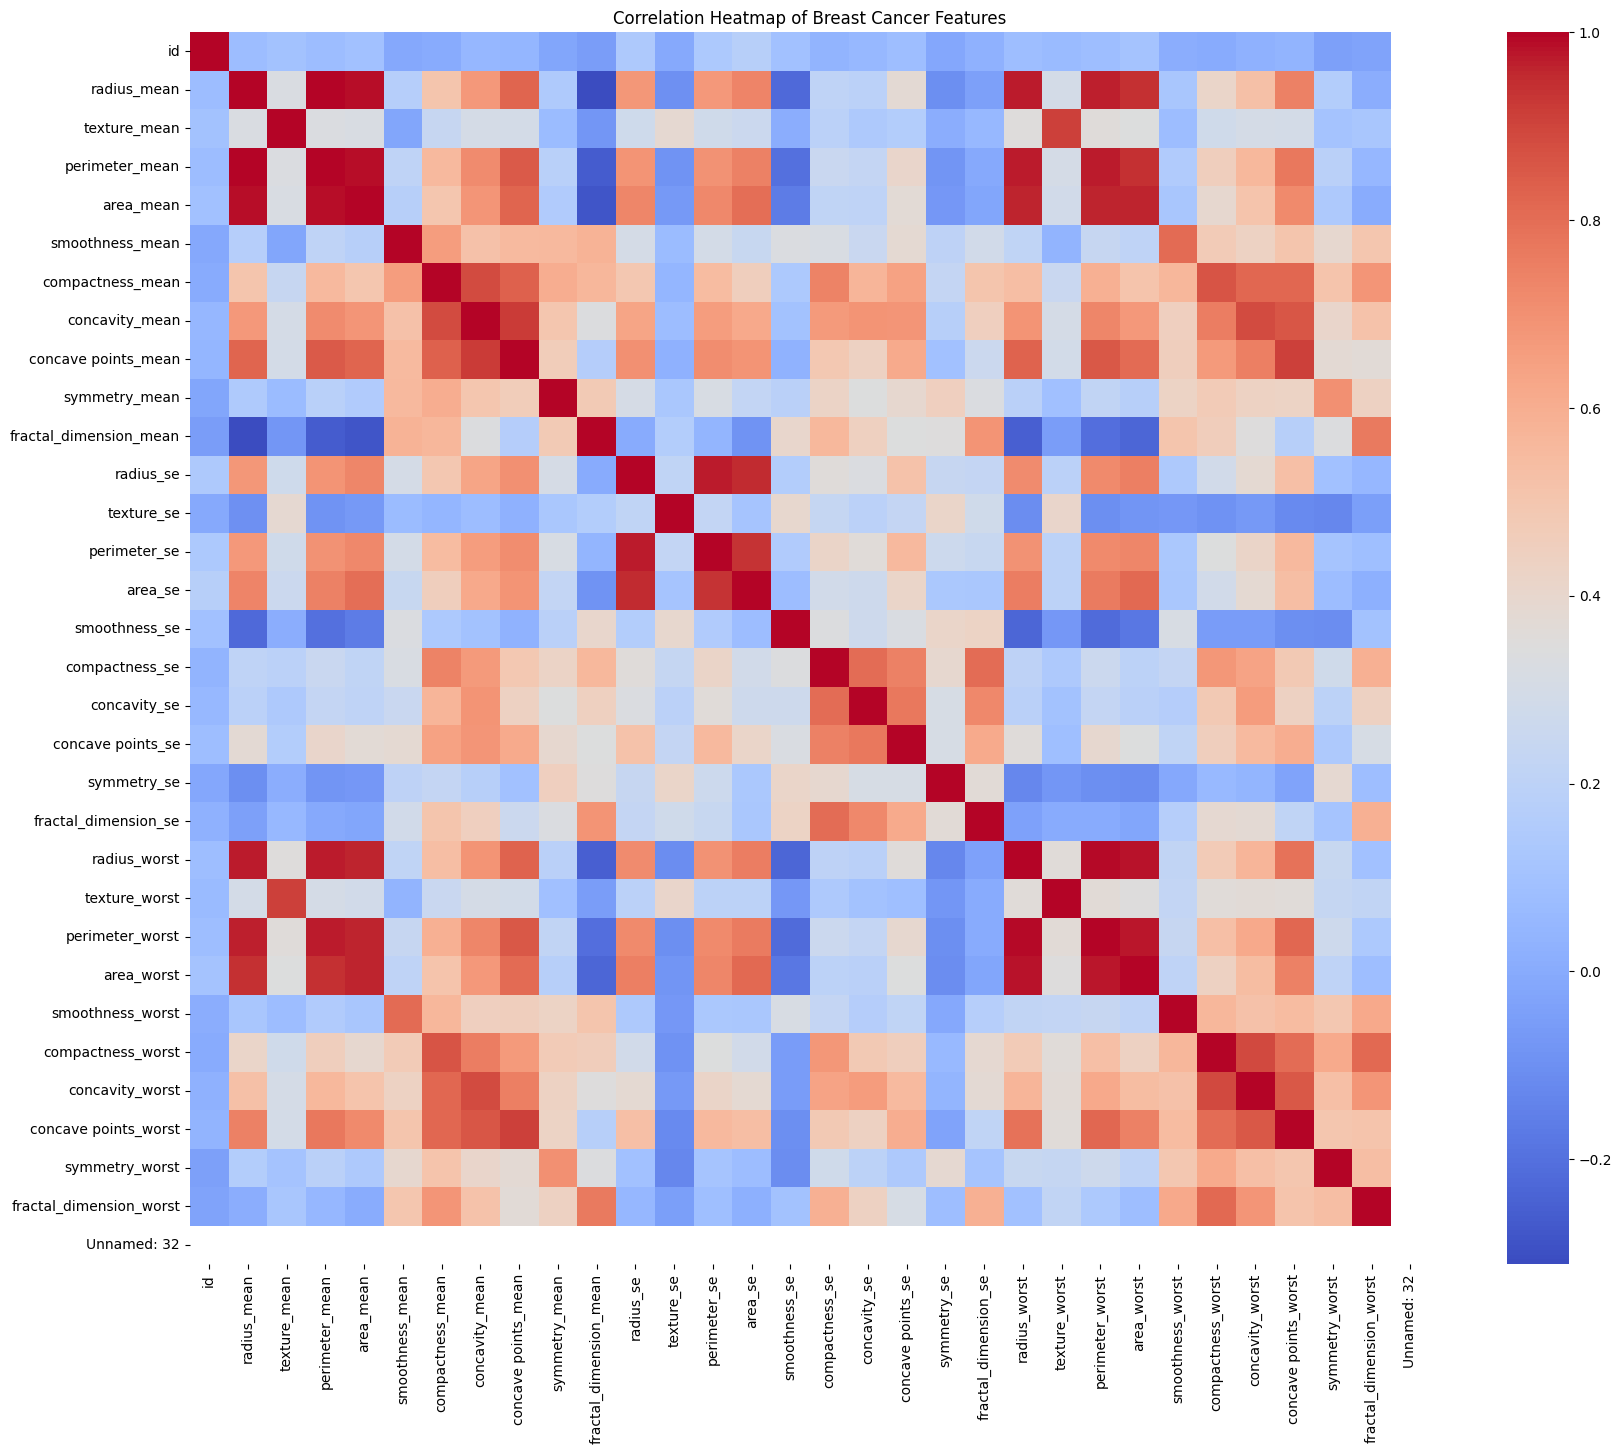

In [7]:
# Correlation Heatmap
plt.figure(figsize=(20,16))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

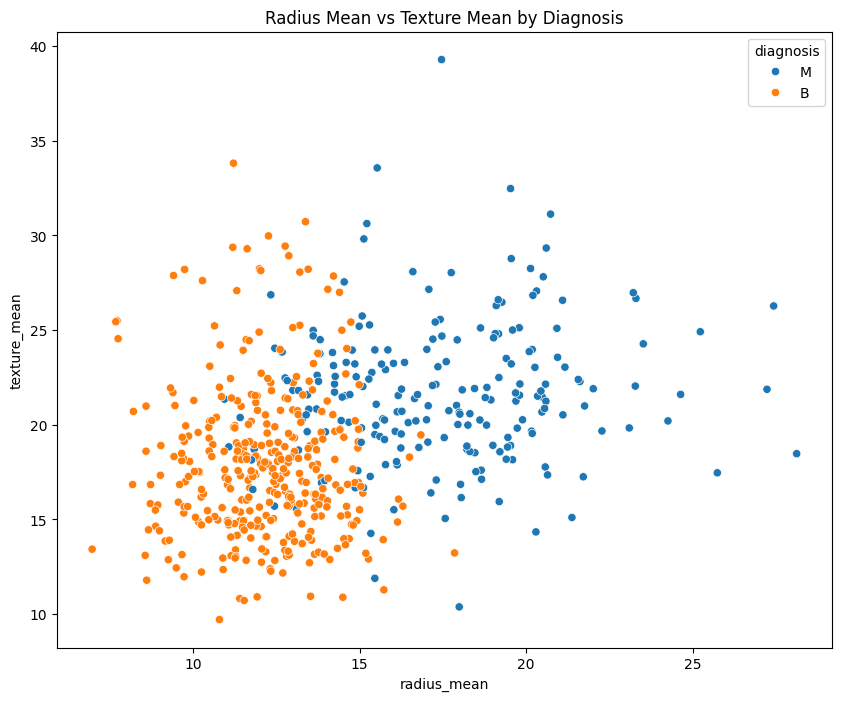

In [9]:
# Scatter Plot for Key Features
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title('Radius Mean vs Texture Mean by Diagnosis')
plt.show()

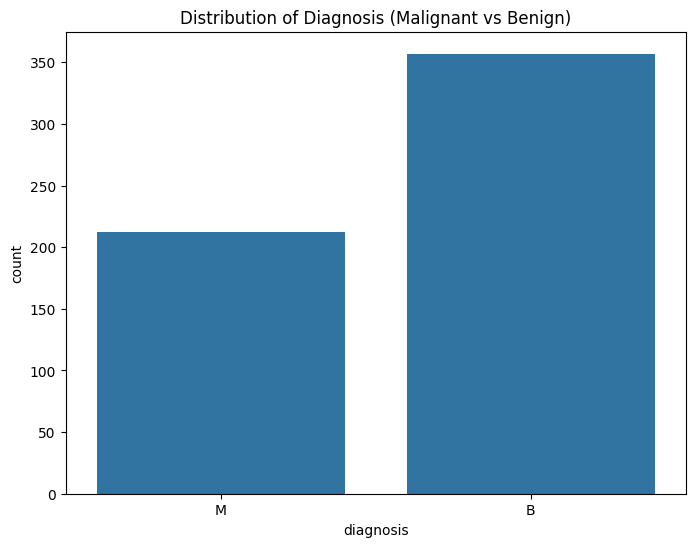

In [10]:
# Distribution of Diagnosis
plt.figure(figsize=(8,6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.show()

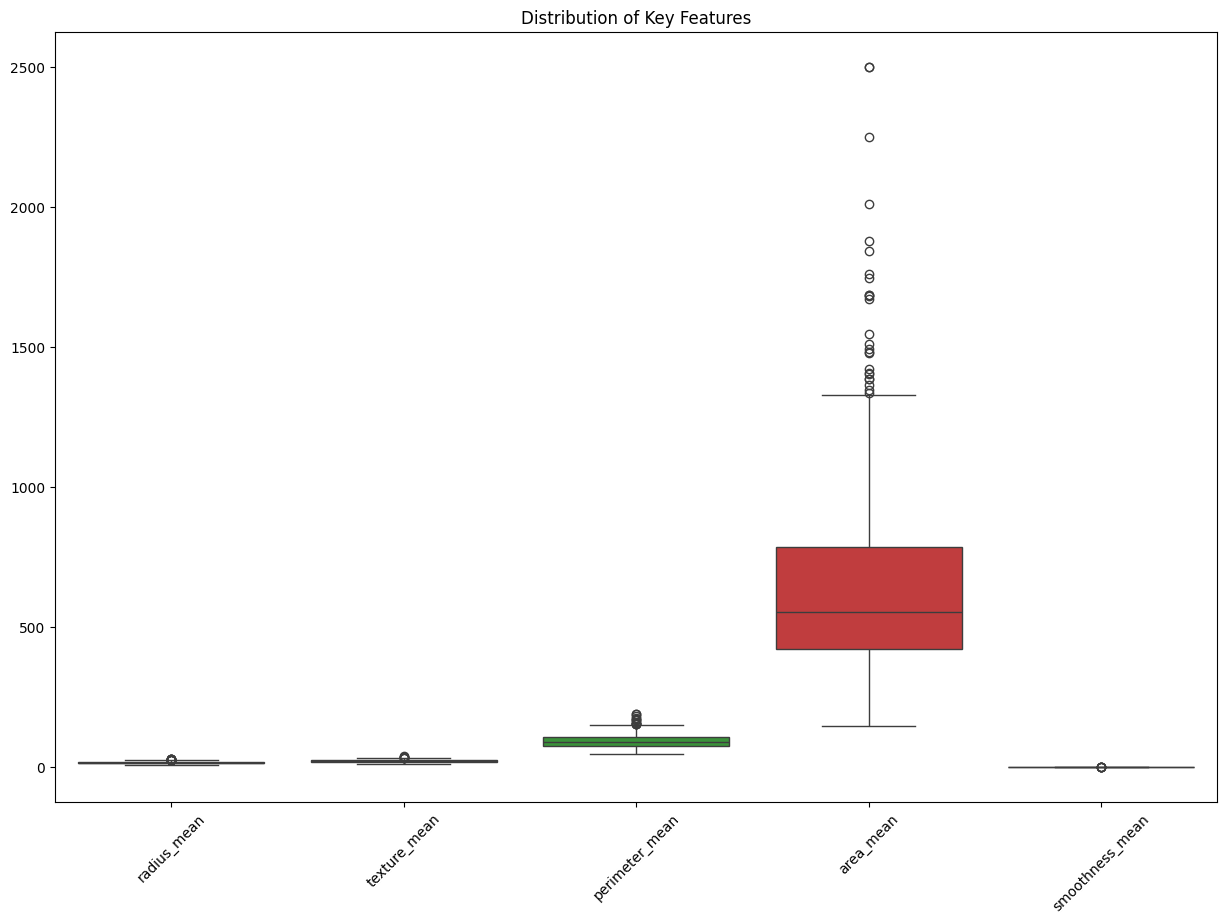

In [13]:
# Box Plot for Key Features
plt.figure(figsize=(15,10))
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.boxplot(data=df[features_to_plot])
plt.title('Distribution of Key Features')
plt.xticks(rotation=45)
plt.show()

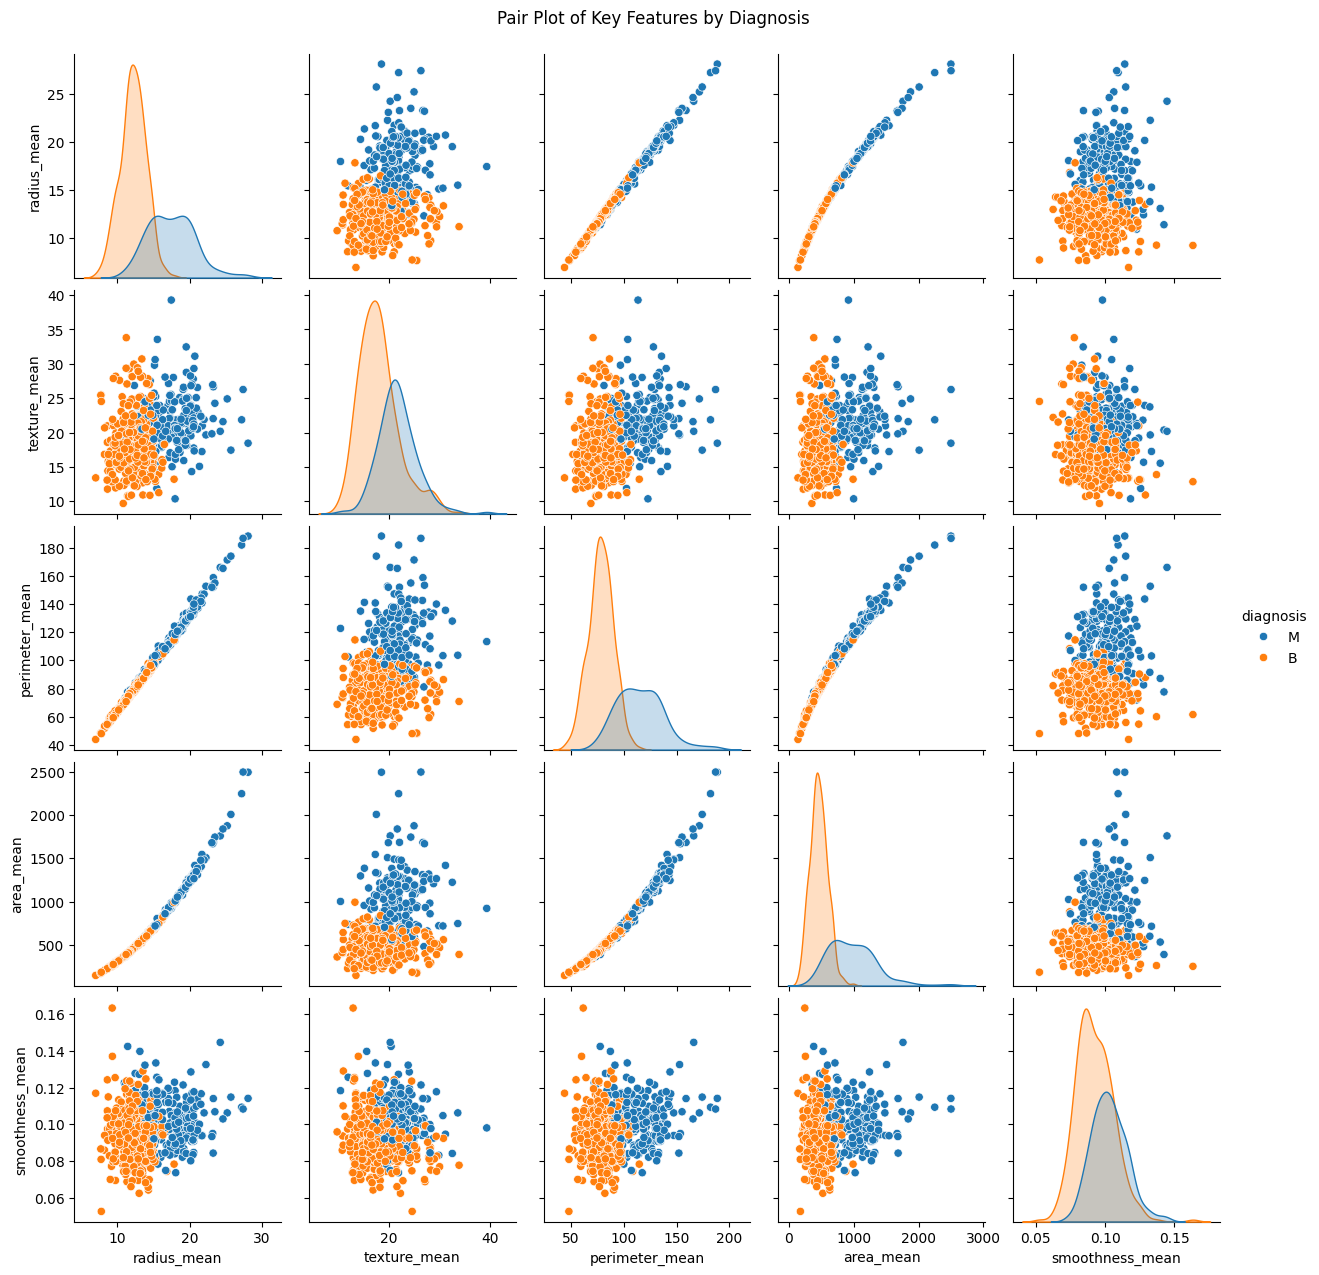

In [14]:
# Pair Plot for Selected Features
sns.pairplot(df[features_to_plot + ['diagnosis']], hue='diagnosis')
plt.suptitle('Pair Plot of Key Features by Diagnosis', y=1.02)
plt.show()

In [16]:
X = df[['radius_mean']]
y = df['texture_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [20]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.12989038563227218
Mean Absolute Error: 3.2494580092293375
Mean Squared Error: 16.946319739410345
Root Mean Squared Error: 4.116590790862063


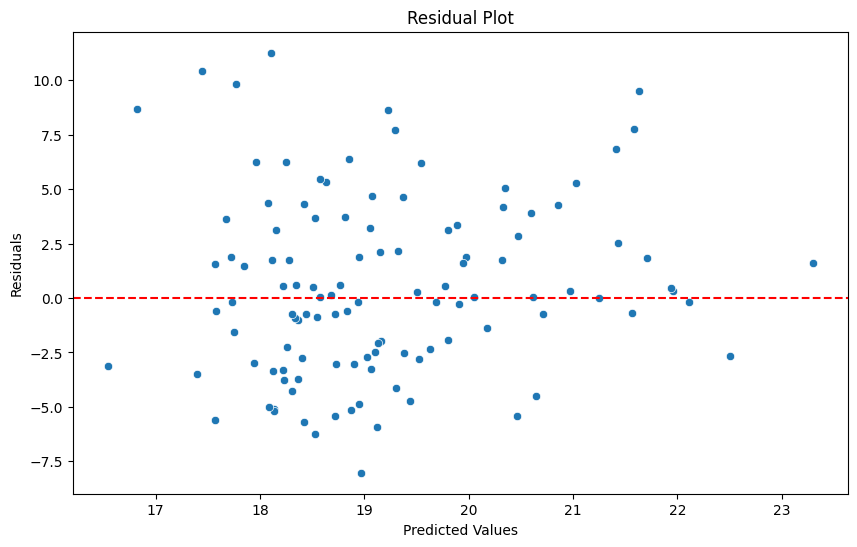

In [21]:
# Residual Plot
plt.figure(figsize=(10,6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

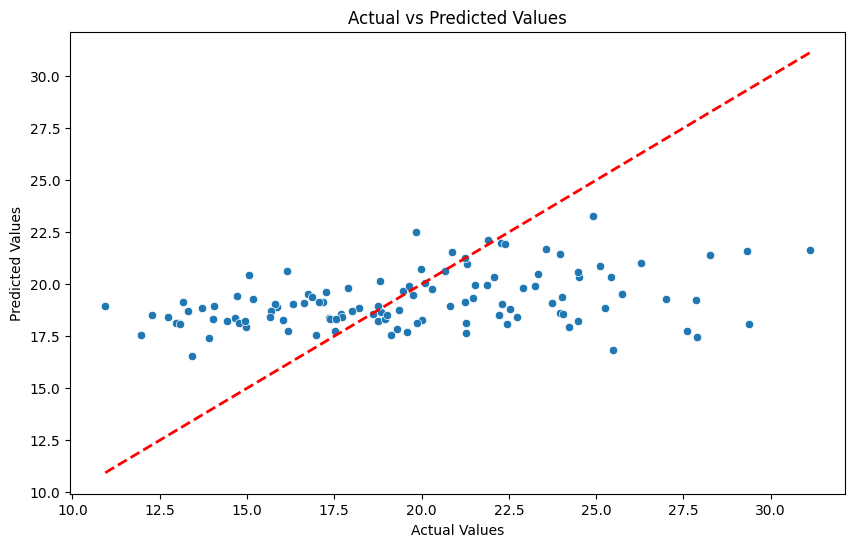

In [22]:
# Actual vs Predicted Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()